# Question Q13

*Question*: In the context of the ML-enabled system projects you participated in, which approach is typically used to deploy ML models?

*Answer Type*: Multiple Option and Free Field

*Options*: [Embedded model (e.g., as part of an in-house developed app). In this approach the model artifact is built and packaged within the consuming application, Model deployed as a separate service (e.g., API-based, on premise or serverless cloud-based ML functions). In this approach the model is wrapped in a service that can be deployed independently for consuming applications, Platform-as-a-Service (PaaS). Using frameworks/tools/environments for deploying the model autonomously and making it available to end-users (e.g., Heroku, SageMaker), Other please specify]

### Necessary Libraries

In [1]:
import pandas as pd
from utils.basic import rename_values, format_wordcloud_text
from utils.dataframe import DataframeUtils
from utils.plot import PlotUtils
from utils.bootstrapping import BootstrappingUtils

### Dataframe Init

In [2]:
dataframe_obj = DataframeUtils('./data/main_data.csv', ';', './data/unused_columns.txt', './data/formatted_columns.txt')
# the index is not important, but when we internally format df we need to reset index
dataframe_obj.df = dataframe_obj.df.reset_index(drop=True)

In [3]:
# For PROFES, we discarded suspended submissions (e.g., remove those who didn't complete the survey).
dataframe_obj.df.drop(dataframe_obj.df[dataframe_obj.df['Status'] == 'Suspended (22)'].index, inplace = True)

In [4]:
# question options
deployments = {
    'Q13_Model_Deploy_Approach_Embedded_Model': 'Embedded Model',
    'Q13_Model_Deploy_Approach_Service': 'Service',
    'Q13_Model_Deploy_Approach_PaaS': 'PaaS',
    'Q13_Model_Deploy_Approach_Others': 'Others',
}

### Basic Analysis

In [5]:
dataframe_obj.df[['Q13_Model_Deploy_Approach_Embedded_Model', 'Q13_Model_Deploy_Approach_Service',
                  'Q13_Model_Deploy_Approach_PaaS', 'Q13_Model_Deploy_Approach_Others', 
                  'Q13_Model_Deploy_Approach_Others_Free']].head()

,Q13_Model_Deploy_Approach_Embedded_Model,Q13_Model_Deploy_Approach_Service,Q13_Model_Deploy_Approach_PaaS,Q13_Model_Deploy_Approach_Others,Q13_Model_Deploy_Approach_Others_Free
0,not quoted,quoted,not quoted,not quoted,-99
1,not quoted,quoted,not quoted,not quoted,-99
2,not quoted,quoted,quoted,not quoted,-99
3,not quoted,quoted,quoted,not quoted,-99
4,not quoted,quoted,not quoted,not quoted,-99


In [6]:
indexes = []
values = []
chart_positions = []
for deployment in deployments:
    indexes.append(deployments[deployment])
    values.append(dataframe_obj.df[deployment].value_counts()['quoted'])
    chart_positions.append(1 if 'Others' not in deployment else 0)

In [7]:
# compute total of unique answers in this question
total = 0
for idx, row in dataframe_obj.df.iterrows():
    
    if row['Q13_Model_Deploy_Approach_Embedded_Model'] == 'quoted' or row['Q13_Model_Deploy_Approach_Service'] == 'quoted' or row['Q13_Model_Deploy_Approach_PaaS'] == 'quoted' or row['Q13_Model_Deploy_Approach_Others'] == 'quoted':
        total += 1

total_answers = 'N = ' + str(total)
total_answers_int = total

In [8]:
# plot object
q13_plot = PlotUtils(pd.DataFrame(
    data={'Deploy Approach': indexes, 'Answers': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Answers'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


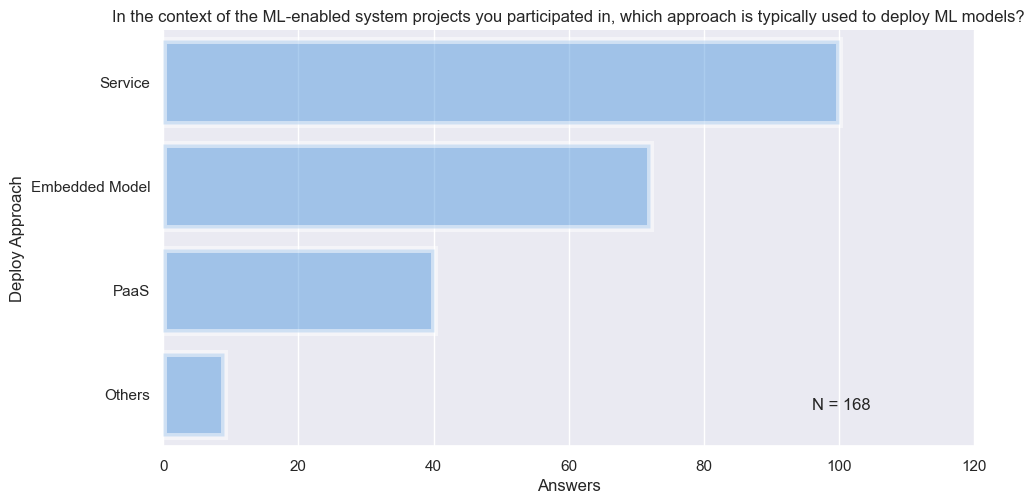

In [9]:
q13_plot.single_barplot(x_axis="Answers", y_axis="Deploy Approach",
                       title="In the context of the ML-enabled system projects you participated in, which approach is typically used to deploy ML models?",
                       x_label="Answers", y_label="Deploy Approach", x_label_rotation=0, color="#429bf5", total_answers=total_answers)

#### WordCloud

In [10]:
deployments_free = list(filter(lambda a: str(a) != '-99', 
                           list(dataframe_obj.df['Q13_Model_Deploy_Approach_Others_Free'])))
deployments_free = list(filter(lambda a: str(a) != '-66', deployments_free))
deployments_free = list(filter(lambda a: str(a) != 'nan', deployments_free))

In [11]:
deployments_words = format_wordcloud_text(texts=deployments_free, use_sep=False)

In [12]:
# plot object
q13_wc_plot = PlotUtils(pd.DataFrame(
    data={'Word': list(deployments_words.keys()), 'Weight': list(deployments_words.values())}
))

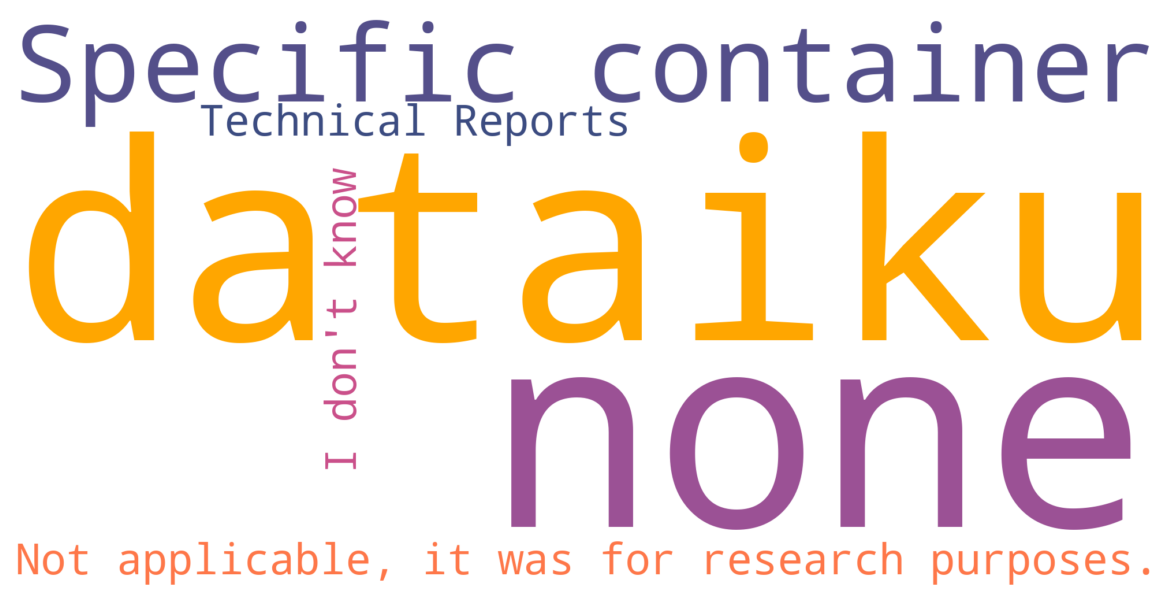

In [13]:
q13_wc_plot.wordcloud("Word", 'Weight')

### Bootstrapping Analysis

In [14]:
prefix = "Q13_Model_Deploy_Approach_"

In [15]:
# the possible answers are the ones in columns
valid_options_list = [deployment_column.split(prefix)[1] for deployment_column in deployments]

In [16]:
# answers could be composed by more than one option, so we will have an array of selected options
valid_answers_list = []
for idx, row in dataframe_obj.df.iterrows():
    answer = []
    for option in valid_options_list:
        if row[prefix + option] == 'quoted':
            answer.append(option)
    
    # if answer is empty, we assume that 'Others' was assigned - in terms of meaning 'Other context not listed'
#     if not answer:
#         answer = ['Others']
    valid_answers_list.append(answer)

In [17]:
replacements = total_answers_int # equals n - total valid answers
population_sample_size = 1000 

bootstrapping_obj = BootstrappingUtils(valid_answers_list, valid_options_list, replacements, population_sample_size, 95)

In [18]:
bootstrapped_dict_data = bootstrapping_obj.bootstrapping(question_type="multiple")

In [19]:
# get a pair of values between dict key and all the list values inside that key 
# key: [val_1, val_2] ---> [(key, val_1), (key, val_2)...]
indexes = []
values = []
chart_positions = []
for idx in bootstrapped_dict_data:
    indexes += [idx for _ in range(len(bootstrapped_dict_data[idx]['population']))]
    values += bootstrapped_dict_data[idx]['population']
    chart_positions += [1 if 'Others' not in idx else 0 for _ in range(len(bootstrapped_dict_data[idx]['population']))]

In [20]:
values = [100 * v for v in values]

In [21]:
# plot object for bootstrapped data
q13_boot_plot = PlotUtils(pd.DataFrame(
    data={'Deploy Approach': indexes, 'Value': values, 'Chart Position': chart_positions}
).sort_values(by=['Chart Position', 'Value'], ascending=False))

C:\Users\Antonio Pedro Alves\.virtualenvs\pfp-antonio-pedro-aVZriNVE\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


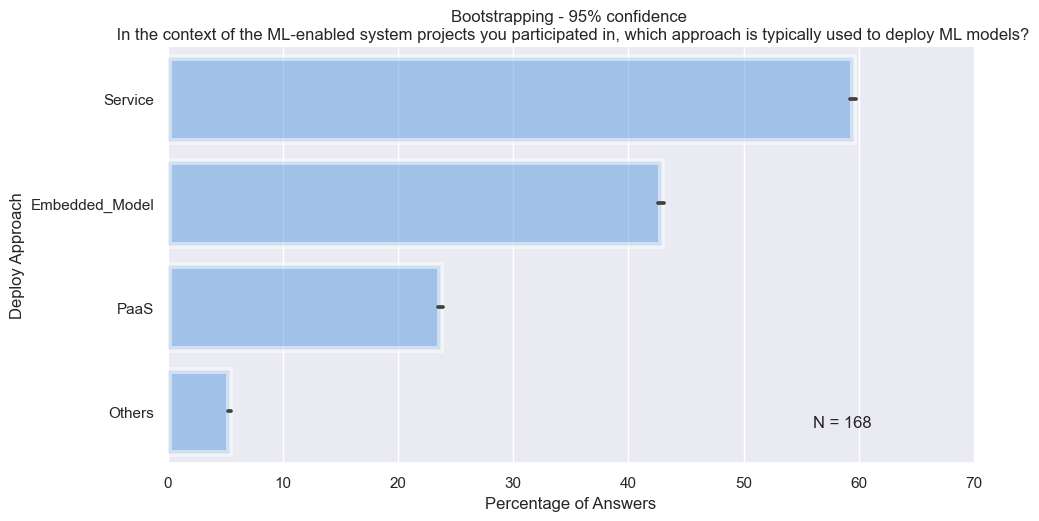

In [22]:
q13_boot_plot.single_barplot(x_axis="Value", y_axis="Deploy Approach", 
                       title="Bootstrapping - 95% confidence \n In the context of the ML-enabled system projects you participated in, which approach is typically used to deploy ML models?",
                       x_label="Percentage of Answers", y_label="Deploy Approach", x_label_rotation=0, color="#429bf5",
                       total_answers=total_answers)

In [23]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':' + str(bootstrapped_dict_data[idx]['confidence']))

Option: (Lower Value, Mean, Upper Value)
Embedded_Model:(0.42594511494164544, 0.4283154761904762, 0.430685837439307)
Service:(0.5925068403434572, 0.594827380952381, 0.5971479215613047)
PaaS:(0.23469326478263655, 0.2367321428571429, 0.23877102093164923)
Others:(0.052552148791021255, 0.053648809523809515, 0.054745470256597775)


In [24]:
# confidence for each option
print("Option: (Lower Value, Mean, Upper Value)")
for idx in bootstrapped_dict_data:
    print(idx + ':: P = ' + str(round((bootstrapped_dict_data[idx]['confidence'][1] * 100), 3)) + " [" + str(round((bootstrapped_dict_data[idx]['confidence'][0] * 100), 3)) + ", " + str(round((bootstrapped_dict_data[idx]['confidence'][2] * 100), 3)) + "]")

Option: (Lower Value, Mean, Upper Value)
Embedded_Model:: P = 42.832 [42.595, 43.069]
Service:: P = 59.483 [59.251, 59.715]
PaaS:: P = 23.673 [23.469, 23.877]
Others:: P = 5.365 [5.255, 5.475]
